We implement a feed-forward neural network to recognize hand-written digits. 

The code is mainly taken from the repository https://github.com/MichalDanielDobrzanski/DeepLearningPython 

Reference book: http://neuralnetworksanddeeplearning.com/

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# import data
from mnist_loader import *

In [20]:
# loading data
training_data, validation_data, test_data = load_data_wrapper()

In [21]:
# import network
from network import *

In [22]:
# create a network with input layer having 784 neurons, hidden layer having 30 neurons 
# and output layer having 10 neurons
net = Network([784, 30, 10])

In [23]:
# train the network on training_data. n_epoch = 30, mini-batch size = 10, eta = 3.0
# we check how the net performs on test_data after every epoch
# kept n_epoch = 2 just for illustration
net.SGD(training_data, 2, 10, 3.0, test_data)

Epoch 0 : 9062 / 10000
Epoch 1 : 9225 / 10000


In [24]:
# uncomment the next command if you want to save the weights and biases of the network and use the network later
# net.save("my_network") 

In [25]:
# loading data
training_data, validation_data, test_data = load_data_wrapper()

In [26]:
trained_net = load("my_network") # load a trained network. The network was trained for 30 epochs.

In [27]:
# check how a trained network perform on test data
test_net(trained_net, test_data)

9502 out of 10000 digits identified correctly !


In [28]:
# see how network performs on some data from testdata
tr_d, va_d, te_d = load_data() # loading the data in original form
image_te_d = np.array([np.reshape(x, (28, 28)) for x in te_d[0]])
vec_te_d = np.array([np.reshape(x, (784,1)) for x in te_d[0]]) # input data in vector form
label_te_d = np.array([x for x in te_d[1]])

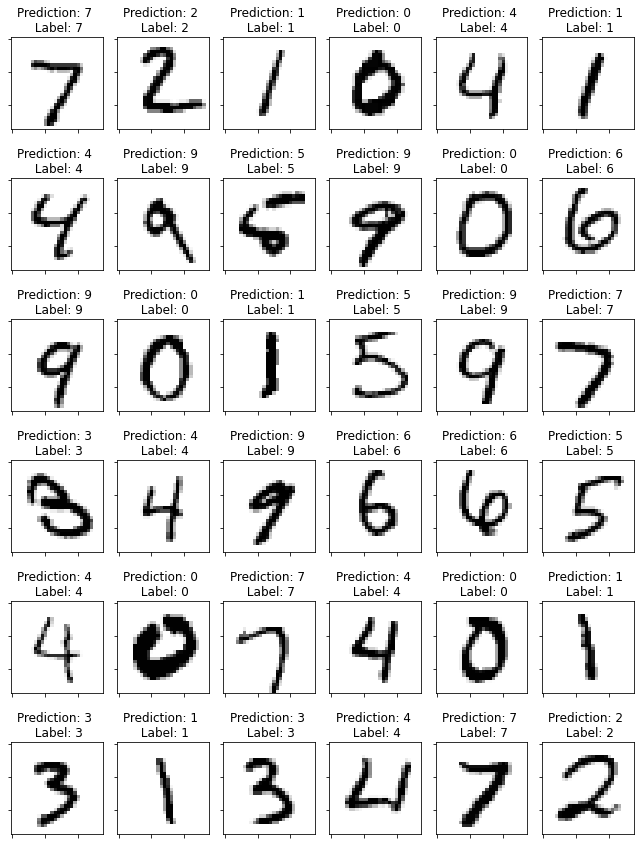

In [29]:
num_row = 6
num_col = 6
idx = 0
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row):
    for j in range(num_col):
        ax = axes[i, j]
        ax.imshow(image_te_d[idx], cmap='gray_r')
        ax.set_title('Prediction: {} \n Label: {}'.format(np.argmax(trained_net.feedforward(vec_te_d[idx])), label_te_d[idx])) 
        # ax.set_title('Label: {}'.format(labels[i]))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        idx += 1
plt.tight_layout()
plt.show()

In [30]:
# loading data
training_data, validation_data, test_data = load_data_wrapper()
arr_idx_bad = find_bad_idx(trained_net, test_data)

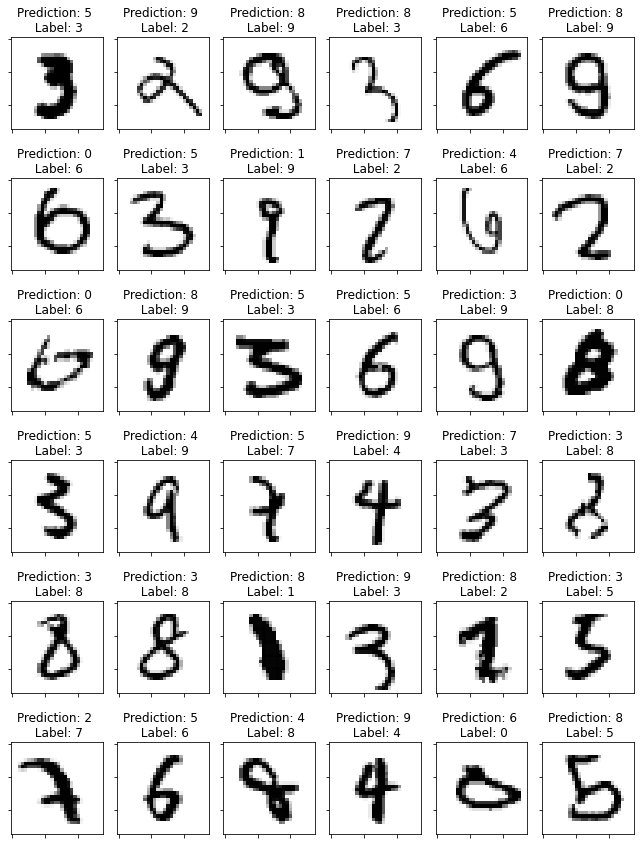

In [31]:
# plot images where network gives bad results
num_row = 6
num_col = 6
idx = 0
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row):
    for j in range(num_col):
        ax = axes[i, j]
        ax.imshow(image_te_d[arr_idx_bad[idx]], cmap='gray_r')
        ax.set_title('Prediction: {} \n Label: {}'.format(np.argmax(trained_net.feedforward(vec_te_d[arr_idx_bad[idx]])), label_te_d[arr_idx_bad[idx]])) 
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        idx += 1
plt.tight_layout()
plt.show()